In [31]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [5]:
df = pd.read_csv('Crop_recommendation.csv')

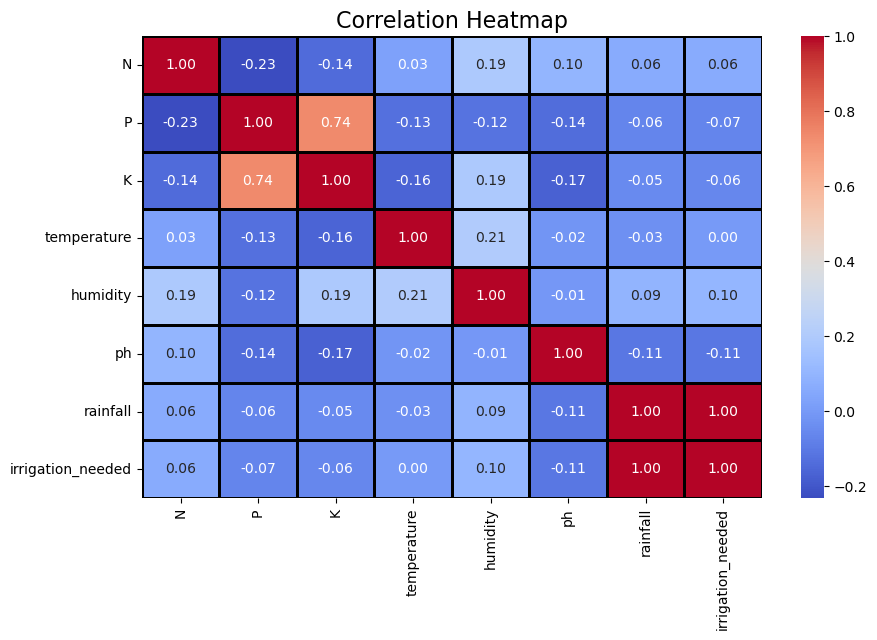

In [35]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'irrigation_needed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [7]:
df['irrigation_needed'] = df['temperature'] * 0.1 + df['rainfall'] * 0.3

In [9]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  
y = df['irrigation_needed']  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([10.74715009, 17.32655738, 37.34512442, 32.73435969, 37.81972261,
       30.92308189, 35.5057573 , 20.30792127, 19.74127844, 17.6717192 ,
       24.39807624, 56.36058628, 34.53936287, 52.18798593, 43.08388967,
       33.77193347, 35.17048047, 22.50657288, 74.91347115, 10.11226517,
       55.2408587 , 26.59780258, 33.92065052, 63.35950478, 25.56026296,
       53.30135197, 19.27747464, 37.62293405, 50.65119817, 61.91657837,
       36.01348415, 13.96521819, 60.58465206, 13.15541689, 59.5573248 ,
       22.97821603, 55.62004366, 23.00715134, 29.2713263 , 20.43490877,
       75.32310216, 31.81523819, 21.7602063 , 22.4967618 , 19.32119242,
       33.93681959, 38.53639149, 50.78249072,  9.09109856, 24.89097038,
       24.85639366, 45.09042158, 23.40808332, 17.41987231, 39.06193673,
       32.05572419, 20.66144146, 39.42763125, 33.51218366, 21.63827685,
       19.71137855, 42.23529972, 18.06906445, 35.1185317 , 16.55786194,
       29.98426739, 38.35830812, 90.86490898,  9.7461098 , 60.08

In [21]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.1569758481828537
R^2 Score: 0.9997656407991582


In [23]:
joblib.dump(model, 'smart_irrigation_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [25]:
loaded_model = joblib.load('smart_irrigation_model.pkl')

In [27]:
new_data = pd.DataFrame([[30, 60, 50, 25, 70, 6.5, 50]], columns=X.columns)
predicted_irrigation = loaded_model.predict(new_data)
print(f'Predicted irrigation needed for new data: {predicted_irrigation[0]}')

Predicted irrigation needed for new data: 17.494233603319998


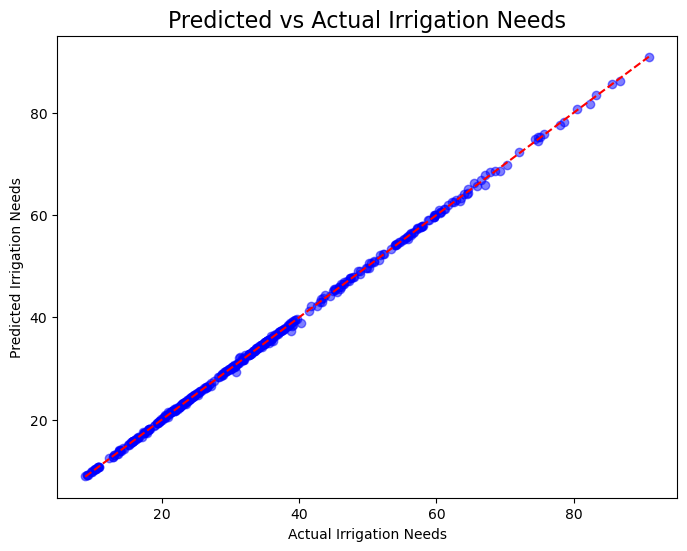

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Irrigation Needs', fontsize=16)
plt.xlabel('Actual Irrigation Needs')
plt.ylabel('Predicted Irrigation Needs')
plt.show()

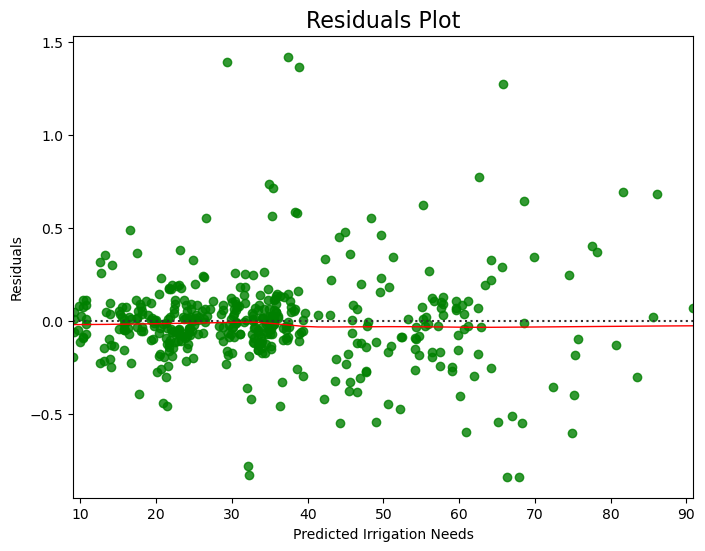

In [33]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='g', line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot', fontsize=16)
plt.xlabel('Predicted Irrigation Needs')
plt.ylabel('Residuals')
plt.show()